In [1]:
import sys
import os
sys.path.append(os.path.abspath('../transformers'))
sys.path.append(os.path.abspath('..'))

In [2]:
import os
import tensorflow as tf
import tensorflow_datasets
from data_utils import CornellMovieDialogsProcessor, InputExample, InputFeatures, cornell_movie_convert_examples_to_features
from utils import create_masks
from transformers import BertTokenizer
from bert_model import Config, Transformer

In [3]:
processor = CornellMovieDialogsProcessor()
train_examples = processor.get_train_examples()
print(len(train_examples))


tain dataset length 177292

test dataset length 44323
177292


In [15]:
for (ex_index, example) in enumerate(train_examples):
    #example = processor.get_example_from_tensor_dict(example)
    print("------------------------")
    print(example.text_a)
    print(example.text_b)
    if ex_index > 10:
        break

------------------------
we re late .
fucking map quest . i never again . i b ext . downtown garage rooftop next b ziering and green approach a large tent . the winnebago is parked off to the side . alf is inside . . . doing something with a welder on the front of the rv .
------------------------
my client has ruled that out .
my client is prepared to entertain an amicable dissolution of the marriage without prejudice .
------------------------
i ll be fine . . . are you a writer , mr fink ?
yes i am . i m working on a wres please call me barton .
------------------------
i want to know what s going on . are you part of this ?
what s going on ? i m going on my second job this month , and now i m going on unemployment .
------------------------
you might be the only one with a job .
baby , don t talk like that . your rehab s going well . you ll be back before you know it .
------------------------
you wanna get me a fuckin snitch jacket ?
you wanna buy your brother ten years . . . ? yo

In [4]:
BERT_MODEL_NAME = 'bert-base-uncased'
VOCAB_SIZE = 30522
MAX_SEQ_LENGTH = 128
config = Config(num_layers=6, d_model=256, dff=1024, num_heads=8)

In [5]:
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL_NAME)
transformer = Transformer(config, VOCAB_SIZE, BERT_MODEL_NAME)

In [16]:
for (ex_index, example) in enumerate(train_examples):
    inputs = tokenizer.encode_plus(
            example.text_a,
            add_special_tokens=True,
            max_length=MAX_SEQ_LENGTH,
        )

    outputs = tokenizer.encode_plus(
            example.text_b,
            add_special_tokens=True,
            max_length=MAX_SEQ_LENGTH,
        )

    print(inputs)
    print()
    print(outputs)
    break

{'special_tokens_mask': [1, 0, 0, 0, 0, 1], 'input_ids': [101, 2057, 2128, 2397, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0]}

{'special_tokens_mask': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 'input_ids': [101, 8239, 4949, 8795, 1012, 1045, 2196, 2153, 1012, 1045, 1038, 4654, 2102, 1012, 5116, 7381, 23308, 2279, 1038, 1062, 21939, 3070, 1998, 2665, 3921, 1037, 2312, 9311, 1012, 1996, 2663, 2638, 16078, 2080, 2003, 9083, 2125, 2000, 1996, 2217, 1012, 24493, 2003, 2503, 1012, 1012, 1012, 2725, 2242, 2007, 1037, 2057, 16502, 2006, 1996, 2392, 1997, 1996, 27634, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [6]:
train_dataset = cornell_movie_convert_examples_to_features(train_examples, tokenizer, MAX_SEQ_LENGTH)

Token indices sequence length is longer than the specified maximum sequence length for this model (625 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (759 > 512). Running this sequence through the model will result in indexing errors


In [7]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(128).batch(BATCH_SIZE).repeat(-1)
inputs, outputs = next(iter(train_dataset))
print(inputs['input_ids'].shape)
print(outputs['output_ids'].shape)
print(inputs['input_ids'][0])
print(outputs['output_ids'][0])

(32, 128)
(32, 128)
tf.Tensor(
[ 101 2054 2079 2057 2079 1029  102    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0], shape=(128,), dtype=int32)
tf.Tensor(
[ 101 1045 2123 1056 2113 1012  102    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 

In [8]:
for x, y in train_dataset:
    input_ids, input_attention_masks, input_token_type_ids = x["input_ids"], x['attention_mask'], x['token_type_ids']
    print("-----------------inputs------------")
    print(input_ids[0])
    print(input_attention_masks[0])
    print(input_token_type_ids[0])
    output_ids = y["output_ids"]
    print("----------------outputs--------------")
    print(output_ids.shape)
    print(output_ids[0])
    break

-----------------inputs------------
tf.Tensor(
[ 101 2016 2351 1999 1037 2482 4926 1012  102    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0], shape=(128,), dtype=int32)
tf.Tensor(
[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], s

In [9]:
inputs, outputs = next(iter(train_dataset))
enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inputs['input_ids'], outputs['output_ids'])
print(enc_padding_mask.shape)
print(combined_mask.shape)
print(dec_padding_mask.shape)

(32, 1, 1, 128)
(32, 1, 128, 128)
(32, 1, 1, 128)


In [10]:
print(enc_padding_mask[0])

tf.Tensor(
[[[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]], shape=(1, 1, 128), dtype=float32)


In [11]:
print(combined_mask[0])

tf.Tensor(
[[[0. 1. 1. ... 1. 1. 1.]
  [0. 0. 1. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]]], shape=(1, 128, 128), dtype=float32)


In [12]:
output,weights = transformer(inputs, outputs, False, enc_padding_mask, combined_mask, dec_padding_mask)
print(output.shape)

(32, 128, 30522)


In [13]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert_for_chat_bot_encoder (B multiple                  109482240 
_________________________________________________________________
decoder (Decoder)            multiple                  15707136  
_________________________________________________________________
dense_60 (Dense)             multiple                  7844154   
Total params: 133,033,530
Trainable params: 133,033,530
Non-trainable params: 0
_________________________________________________________________


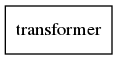

In [14]:
tf.keras.utils.plot_model(
    transformer, to_file='bert_chatbot_model.png', show_shapes=True)